k=1, Accuracy = 0.71
k=3, Accuracy = 0.69
k=5, Accuracy = 0.69
k=7, Accuracy = 0.71
k=9, Accuracy = 0.76






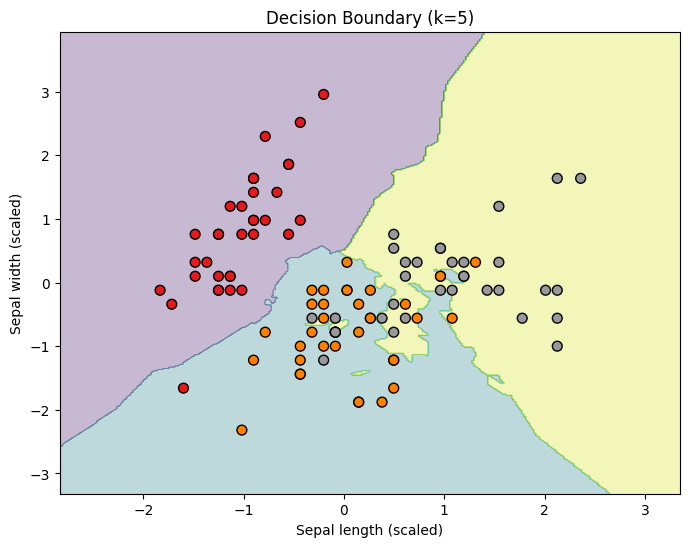



Confusion Matrix (k=5):
 [[15  0  0]
 [ 0 11  4]
 [ 0 10  5]]




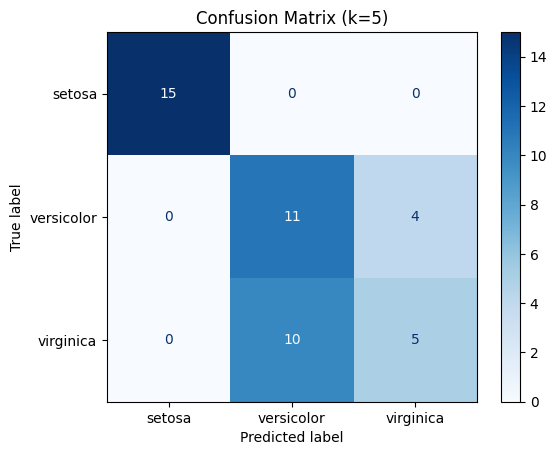

In [23]:
# k-NN Classification on Iris Dataset


# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Step 2: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only first 2 features for visualization
y = iris.target


# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Step 4: Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Step 5: Try different k values and check accuracy
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"k={k}, Accuracy = {accuracy_score(y_test, y_pred):.2f}")

print("\n")


# Step 6: Visualize decision boundaries for one k
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap=plt.cm.Set1)
    plt.title(title)
    plt.xlabel("Sepal length (scaled)")
    plt.ylabel("Sepal width (scaled)")
    plt.show()
    plt.close()

print("\n")

# Step 7: Train with k=5 and plot decision boundary
knn_final = KNeighborsClassifier(n_neighbors=5)
knn_final.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, knn_final, "Decision Boundary (k=5)")


# Step 8: Compute and plot confusion matrix for k=5
y_pred_final = knn_final.predict(X_test)
cm = confusion_matrix(y_test, y_pred_final)

print("\n")
print("Confusion Matrix (k=5):\n", cm)
print("\n")


ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot(cmap="Blues")
plt.title("Confusion Matrix (k=5)")
plt.show()
plt.close()

